In [1]:
"""
Analyse textuelle des descriptions et noms
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import ast
import re



In [2]:
def load_data():
    """Charge les données"""
    df = pd.read_csv("../data/RAW_recipes.csv")
    return df

In [3]:
def analyze_recipe_names(df):
    """Analyse des noms de recettes"""
    
    print("\n" + "="*60)
    print("ANALYSE DES NOMS DE RECETTES")
    print("="*60)
    
    # CORRECTION : Filtrer les valeurs manquantes
    df_clean = df[df['name'].notna()].copy()
    
    print(f"\n Vérification des données:")
    print(f"  Recettes totales: {len(df):,}")
    print(f"  Recettes avec nom: {len(df_clean):,}")
    print(f"  Recettes sans nom: {len(df) - len(df_clean):,}")
    
    if len(df_clean) == 0:
        print("  ERREUR: Aucune recette avec un nom valide!")
        return
    
    # Longueur des noms
    df_clean['name_length'] = df_clean['name'].str.len()
    df_clean['name_words'] = df_clean['name'].str.split().str.len()
    
    print(f"\n Statistiques sur les noms:")
    print(f"  Longueur moyenne: {df_clean['name_length'].mean():.1f} caractères")
    print(f"  Mots moyens: {df_clean['name_words'].mean():.1f}")
    print(f"  Nom le plus court: '{df_clean.loc[df_clean['name_length'].idxmin(), 'name']}'")
    print(f"  Nom le plus long: '{df_clean.loc[df_clean['name_length'].idxmax(), 'name'][:80]}...'")
    
    # Mots les plus fréquents dans les noms
    all_words = []
    for name in df_clean['name']:
        words = re.findall(r'\w+', name.lower())
        all_words.extend(words)
    
    # Exclure les mots courts et communs
    stopwords = {'and', 'or', 'with', 'for', 'the', 'to', 'of', 'in', 'a', 'an', 'i', 'ii', 'iii'}
    filtered_words = [w for w in all_words if len(w) > 3 and w not in stopwords]
    
    word_counts = Counter(filtered_words)
    top_words = word_counts.most_common(30)
    
    print(f"\n Top 30 mots dans les noms de recettes:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"  {i:2d}. {word:20s} : {count:6,} occurrences")
    
    # Word Cloud
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Word cloud des noms
    if len(word_counts) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                              colormap='viridis', max_words=100).generate_from_frequencies(word_counts)
        
        axes[0].imshow(wordcloud, interpolation='bilinear')
        axes[0].axis('off')
        axes[0].set_title('Mots-clés dans les noms de recettes', fontsize=14, fontweight='bold')
    
    # Distribution de la longueur des noms
    axes[1].hist(df_clean['name_words'], bins=range(1, 20), edgecolor='black', alpha=0.7, color='skyblue')
    axes[1].axvline(df_clean['name_words'].median(), color='red', linestyle='--', linewidth=2,
                    label=f'Médiane = {df_clean["name_words"].median():.0f} mots')
    axes[1].set_xlabel('Nombre de mots dans le nom', fontsize=12)
    axes[1].set_ylabel('Fréquence', fontsize=12)
    axes[1].set_title('Distribution de la longueur des noms', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()

    plt.show()

In [4]:
def analyze_descriptions(df):
    """Analyse des descriptions"""
    
    print("\n" + "="*60)
    print("ANALYSE DES DESCRIPTIONS")
    print("="*60)
    
    #  CORRECTION : Filtrer les valeurs manquantes
    df_clean = df[df['description'].notna()].copy()
    
    print(f"\n Vérification des données:")
    print(f"  Recettes totales: {len(df):,}")
    print(f"  Recettes avec description: {len(df_clean):,} ({len(df_clean)/len(df)*100:.1f}%)")
    print(f"  Recettes sans description: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")
    
    if len(df_clean) == 0:
        print("  ERREUR: Aucune recette avec description!")
        return
    
    # Longueur des descriptions
    df_clean['desc_length'] = df_clean['description'].str.len()
    df_clean['desc_words'] = df_clean['description'].str.split().str.len()
    
    print(f"\n Statistiques sur les descriptions:")
    print(f"  Longueur moyenne: {df_clean['desc_length'].mean():.0f} caractères")
    print(f"  Mots moyens: {df_clean['desc_words'].mean():.1f}")
    print(f"  Description la plus courte: {df_clean['desc_length'].min()} caractères")
    print(f"  Description la plus longue: {df_clean['desc_length'].max()} caractères")
    
    # Mots les plus fréquents
    all_words = []
    for desc in df_clean['description']:
        if isinstance(desc, str):  # Double vérification
            words = re.findall(r'\w+', desc.lower())
            all_words.extend(words)
    
    stopwords = {'the', 'and', 'for', 'with', 'this', 'that', 'you', 'your', 'from', 
                 'are', 'can', 'will', 'been', 'have', 'has', 'was', 'were', 'they',
                 'make', 'made', 'recipe', 'great', 'very', 'good', 'best'}
    filtered_words = [w for w in all_words if len(w) > 4 and w not in stopwords]
    
    word_counts = Counter(filtered_words)
    top_words = word_counts.most_common(20)
    
    print(f"\n Top 20 mots dans les descriptions:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"  {i:2d}. {word:15s} : {count:7,} occurrences")
    
    # Word Cloud
    fig, ax = plt.subplots(figsize=(12, 6))
    
    if len(word_counts) > 0:
        wordcloud = WordCloud(width=1200, height=600, background_color='white',
                              colormap='plasma', max_words=150).generate_from_frequencies(word_counts)
        
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title('Mots-clés dans les descriptions', fontsize=14, fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'Pas de mots à afficher', ha='center', va='center', fontsize=14)
        ax.axis('off')
    
    plt.tight_layout()

    plt.show()

 Chargement des données...
 231,637 recettes chargées


ANALYSE DES NOMS DE RECETTES

 Vérification des données:
  Recettes totales: 231,637
  Recettes avec nom: 231,636
  Recettes sans nom: 1

 Statistiques sur les noms:
  Longueur moyenne: 27.9 caractères
  Mots moyens: 4.4
  Nom le plus court: 'b52'
  Nom le plus long: 'defrost chops in the morning    want spaghetti in the evening   a culinary compr...'

 Top 30 mots dans les noms de recettes:
   1. chicken              : 22,966 occurrences
   2. salad                : 13,299 occurrences
   3. sauce                : 10,075 occurrences
   4. cheese               :  9,745 occurrences
   5. chocolate            :  9,029 occurrences
   6. soup                 :  8,859 occurrences
   7. cake                 :  8,344 occurrences
   8. bread                :  7,074 occurrences
   9. cream                :  6,534 occurrences
  10. easy                 :  6,445 occurrences
  11. cookies              :  6,012 occurrences
  12. rice           

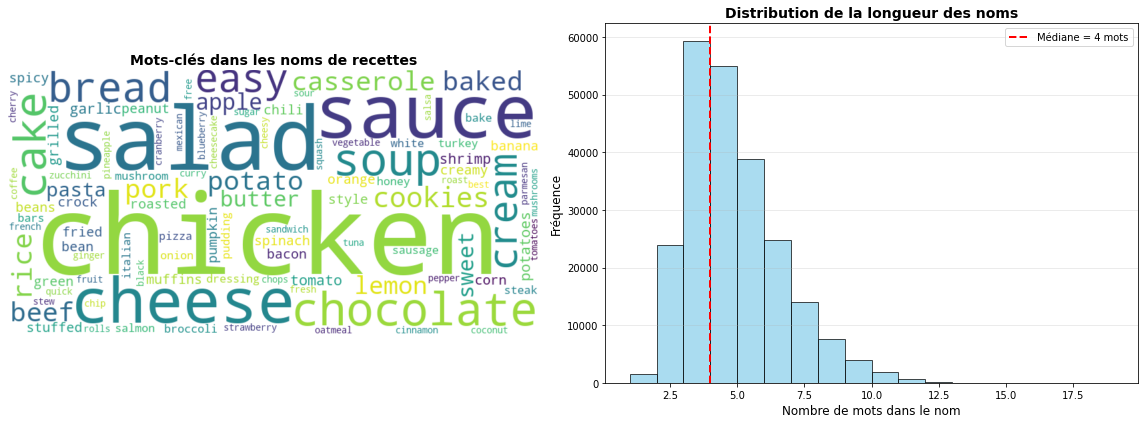


ANALYSE DES DESCRIPTIONS

 Vérification des données:
  Recettes totales: 231,637
  Recettes avec description: 226,658 (97.9%)
  Recettes sans description: 4,979 (2.1%)

 Statistiques sur les descriptions:
  Longueur moyenne: 200 caractères
  Mots moyens: 36.4
  Description la plus courte: 1 caractères
  Description la plus longue: 6321 caractères

 Top 20 mots dans les descriptions:
   1. these           :  29,044 occurrences
   2. delicious       :  23,211 occurrences
   3. chicken         :  19,676 occurrences
   4. sauce           :  18,636 occurrences
   5. found           :  18,255 occurrences
   6. cooking         :  17,806 occurrences
   7. serve           :  15,914 occurrences
   8. really          :  15,481 occurrences
   9. salad           :  15,240 occurrences
  10. taste           :  14,920 occurrences
  11. family          :  14,900 occurrences
  12. recipes         :  14,614 occurrences
  13. favorite        :  14,424 occurrences
  14. bread           :  14,072 occurrenc

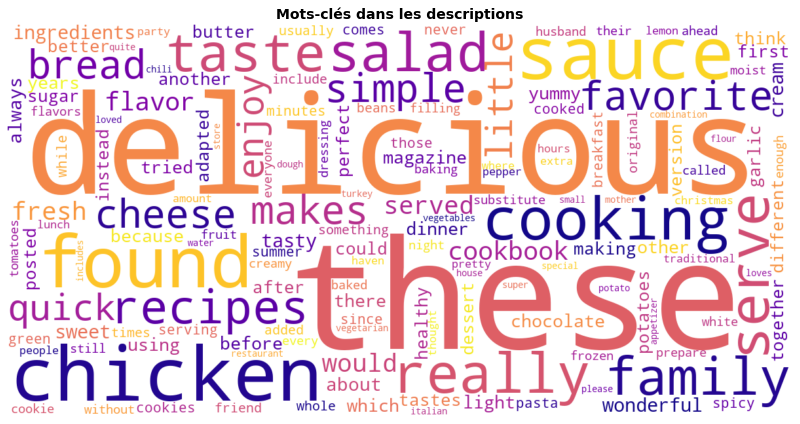

In [5]:
def main():
    """Fonction principale"""
    
    print(" Chargement des données...")
    df = load_data()
    print(f" {len(df):,} recettes chargées\n")
    
    analyze_recipe_names(df)
    analyze_descriptions(df)
    

if __name__ == "__main__":
    main()